In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np 
import spikeinterface.comparison as sc
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.toolkit as st
import spikeinterface.widgets as sw
import scipy.io
import h5py
import hdf5storage
import time
import os
from sklearn import preprocessing 

09:17:04 [I] klustakwik KlustaKwik2 version 0.2.6


In [2]:
def extract_recording(timeseries):
  sampling_frequency = 40000  # in Hz
  geom = np.zeros((num_channels, 2))
  geom[:, 0] = range(num_channels)
  recording = se.NumpyRecordingExtractor(timeseries=timeseries, geom=geom, sampling_frequency=sampling_frequency)
    
  print('Num. channels = {}'.format(len(recording.get_channel_ids())))
  print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
  print('Num. timepoints = {}'.format(recording.get_num_frames()))

  return recording

In [3]:
def preprocess_recording(recording, freq_min, freq_max):
  """ Bandpass filter for recording """

  start_time = time.time()
  recording_f = st.preprocessing.bandpass_filter(recording, freq_min=freq_min, freq_max=freq_max)

  return recording_f

In [4]:
def sort_recording(recording, file_name):
  
  start_time = time.time()

  output_dir = '../tmp_MS4/'
  if not os.path.exists(output_dir):
    os.mkdir(output_dir)

  default_ms4_params = ss.Mountainsort4Sorter.default_params()
  default_ms4_params['detect_threshold'] = 4
  default_ms4_params['curation'] = False
  default_ms4_params['filter'] = False
    
  sorting = ss.run_mountainsort4(recording=recording, **default_ms4_params, output_folder=output_dir+file_name)

  print("Sorting time:", time.time() - start_time)

  return sorting

In [5]:
def postprocess_recording(recording, sorting, file_name):
  output_dir = '../average_waveform/'
  if not os.path.exists(output_dir):
    os.mkdir(output_dir)

  wf = st.postprocessing.get_unit_waveforms(recording, sorting, ms_before=1, ms_after=2,
                                            save_as_features=True, verbose=True)
  print("Shared unit spike feature names: ", sorting.get_shared_unit_spike_feature_names())
  print("Waveforms (n_spikes, n_channels, n_points)", wf[0].shape)

  max_chan = st.postprocessing.get_unit_max_channels(recording, sorting, save_as_property=True, verbose=True)
  savename = output_dir+file_name+'_avg_waveforms.mat'

  templates = st.postprocessing.get_unit_templates(recording, sorting, max_spikes_per_unit=200,
                                                  save_as_property=True, verbose=True)
    
  metrics= st.validation.compute_quality_metrics(sorting=sorting, recording=recording,
                                                metric_names=['firing_rate', 'isi_violation', 'snr', 'nn_hit_rate', 'nn_miss_rate'],
                                                as_dataframe=True)

  scipy.io.savemat(savename,{'wf':wf,'maxchn':max_chan, 'templates':templates, 'metrics':metrics}, do_compression=True)

  return wf, max_chan, templates, metrics

In [6]:
def visualize_waveforms(wf, templates, file_name):
    output_dir = "waveform_visualization/"
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    fig, axs = plt.subplots(3, 1, constrained_layout=True)
    for i in range(len(wf)):
        axs[0].plot(wf[i][:, 0, :].T, lw=0.3)
        axs[0].set_ylim(-0.1, 0.1)
        normalized_wf = preprocessing.normalize(wf[i][:,0,:])
        axs[1].plot(normalized_wf.T, lw=0.3)
        normalized_templates = preprocessing.normalize(templates[i][:,:])
        axs[2].plot(normalized_templates.T, label=i+1)
        legend = axs[2].legend(loc='lower right', ncol=2)
        axs[0].set_title('Zoomed in waveform viz for '+ file_name)
        axs[1].set_title('Normalized waveforms viz for '+ file_name)
        axs[2].set_title('Normalized template viz for '+ file_name)
    fig.savefig(output_dir + file_name + '_waveforms.png')

In [ ]:
def visualize_total(sorting, wf, templates, filename)

In [9]:
directory_in_str = "../eisi_raw_mat_files"
directory = os.fsencode(directory_in_str)

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 59344867
'end_frame' set to 59344867
Sorting time: 20.031111001968384
Waveform 1/4
Waveform 2/4
Waveform 3/4
Waveform 4/4
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 55069237
'end_frame' set to 55069237
Sorting time: 17.9978609085083
Waveform 1/6
Waveform 2/6
Waveform 3/6
Waveform 4/6
Waveform 5/6
Waveform 6/6
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 211238634
'end_frame' set to 211238634
Sorting time: 65.19135999679565
Waveform 1/5
Waveform 2/5
Waveform 3/5
Waveform 4/5
Waveform 5/5
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
Num. channels = 1
Sampl

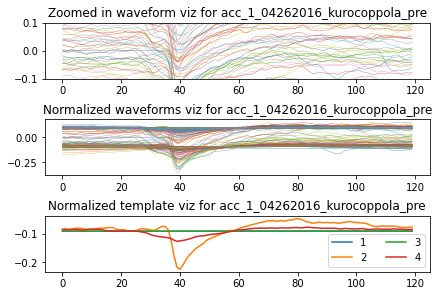

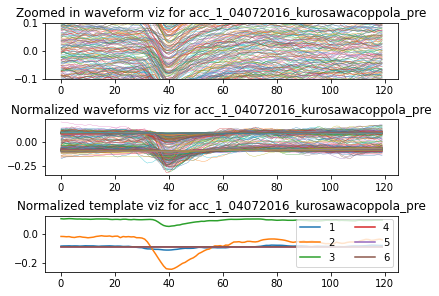

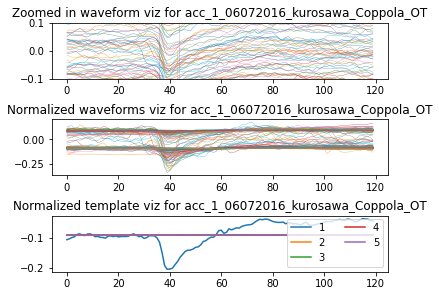

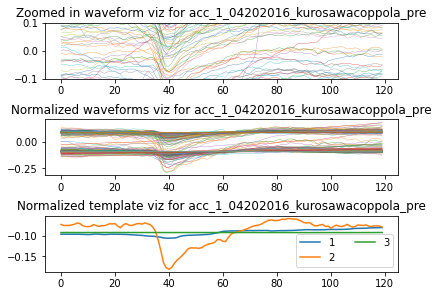

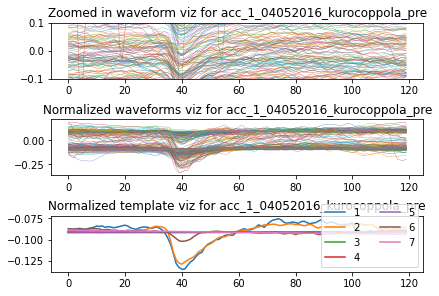

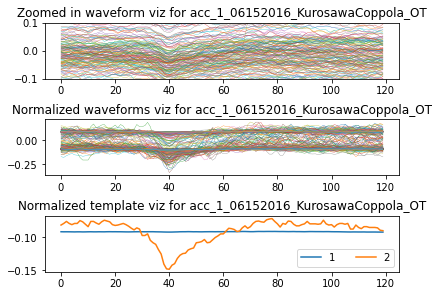

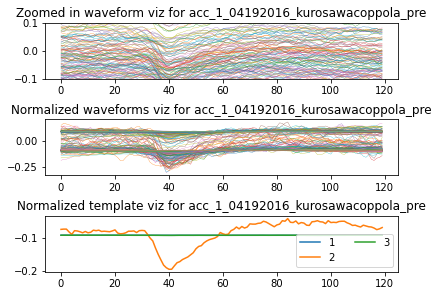

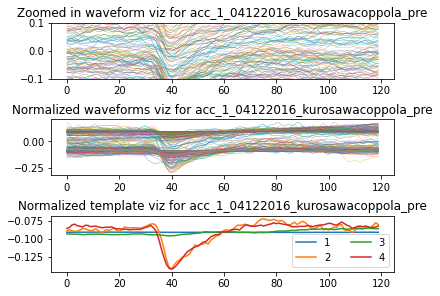

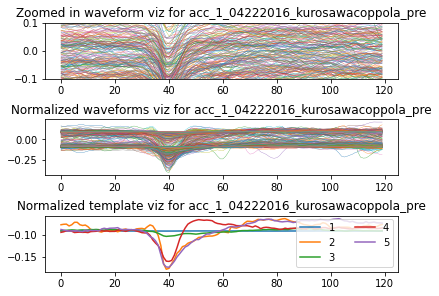

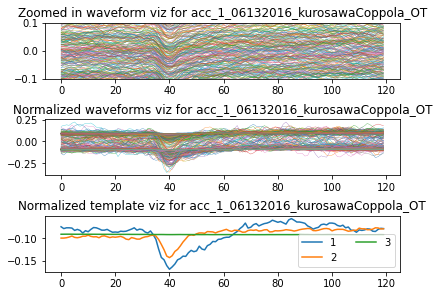

In [9]:
# Run MountainSort4 saving waveforms, max number of channels, templates and metrics
# Visualize waveforms and save figures
# Compute metrics for each of the sorting's 'firing_rate', 'isi_violation', 'snr', 'nn_hit_rate', 'nn_miss_rate'

sessions_used = []
metrics_sessions = []
templates_sessions = []
for file in os.listdir(directory):
    file_name = os.fsdecode(file)
    # file_name = "acc_1_04052016_kurocoppola_pre.mat"
    file_path = os.path.join(directory_in_str, file_name)
    file_name = file_name.replace('.mat', '')
    f = h5py.File(file_path, 'r')
    num_channels = f['mat'].shape[1]
    ts = np.transpose(np.array(f['mat']))
    f.close()
    recording = extract_recording(timeseries=ts)
    recording_f = preprocess_recording(recording=recording, freq_min=300, freq_max=6000)
    sorting = sort_recording(recording=recording_f, file_name=file_name)
    wf, max_chan, templates, metrics = postprocess_recording(recording = recording, sorting = sorting, file_name = file_name)
    visualize_waveforms(wf, templates, file_name)
    metrics_sessions.append(metrics)
    sessions_used.append(file_name)
    templates_sessions.append(templates)
scipy.io.savemat('pl2_used.mat',{'sessions_used':sessions_used}, do_compression=True)

In [10]:
num_units = []
files = [os.fsdecode(file) for file in os.listdir(directory)]
print(files)
for i in range(7):
    unit_per_iteration = []
    for file in os.listdir(directory):
        file_name = os.fsdecode(file)
        # file_name = "acc_1_04052016_kurocoppola_pre.mat"
        file_path = os.path.join(directory_in_str, file_name)
        file_name = file_name.replace('.mat', '')
        f = h5py.File(file_path, 'r')
        num_channels = f['mat'].shape[1]
        ts = np.transpose(np.array(f['mat']))
        f.close()
        recording = extract_recording(timeseries=ts)
        recording_f = preprocess_recording(recording=recording, freq_min=300, freq_max=6000)
        sorting = sort_recording(recording=recording_f, file_name=file_name)
        wf, max_chan, templates, metrics = postprocess_recording(recording = recording, sorting = sorting, file_name = file_name)
        sig = metrics[metrics.isi_violation < 1]
        print(sig)
        unit_per_iteration.append((len(metrics), len(sig)))
    num_units.append(unit_per_iteration)
print(num_units)
#         print(f'Number of valid units in {sessions_used[x]} before {len(metrics_sessions[x])} after {len(sig)} with units {units}')
#     scipy.io.savemat('pl2_used.mat',{'sessions_used':sessions_used}, do_compression=True)

['acc_1_04262016_kurocoppola_pre.mat', 'acc_1_04072016_kurosawacoppola_pre.mat', 'acc_1_06072016_kurosawa_Coppola_OT.mat', 'acc_1_04202016_kurosawacoppola_pre.mat', 'acc_1_04052016_kurocoppola_pre.mat', 'acc_1_06152016_KurosawaCoppola_OT.mat', 'acc_1_04192016_kurosawacoppola_pre.mat', 'acc_1_04122016_kurosawacoppola_pre.mat', 'acc_1_04222016_kurosawacoppola_pre.mat', 'acc_1_06132016_kurosawaCoppola_OT.mat']
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 59344867
'end_frame' set to 59344867
Sorting time: 16.52965497970581
Waveform 1/4
Waveform 2/4
Waveform 3/4
Waveform 4/4
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
   firing_rate  isi_violation        snr  nn_hit_rate  nn_miss_rate
3     4.467446       0.022704  12.257344     0.467778      0.193704
4     3.796790       0.015717  11.051244     0.455556      0.188148
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 55069

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 274608807
'end_frame' set to 274608807
Sorting time: 77.59311294555664
Waveform 1/2
Waveform 2/2
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
   firing_rate  isi_violation        snr  nn_hit_rate  nn_miss_rate
2     1.482254       0.467986  14.661235         0.73          0.28
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 63000564
'end_frame' set to 63000564
'end_frame' set to 63000564
Sorting time: 22.067824840545654
Waveform 1/3
Waveform 2/3
Waveform 3/3
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
   firing_rate  isi_violation        snr  nn_hit_rate  nn_miss_rate
2     3.415208       0.475738  13.725049     0.802222      0.119444
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 59366303
'end_frame' set to 59366303
Sorting

/Users/beam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/beam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Empty DataFrame
Columns: [firing_rate, isi_violation, snr, nn_hit_rate, nn_miss_rate]
Index: []
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 63000564
'end_frame' set to 63000564
'end_frame' set to 63000564
Sorting time: 17.297000885009766
Waveform 1/3
Waveform 2/3
Waveform 3/3
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
   firing_rate  isi_violation        snr  nn_hit_rate  nn_miss_rate
2     3.407589       0.477868  11.706659     0.846667      0.091111
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 59366303
'end_frame' set to 59366303
Sorting time: 14.750050067901611
Waveform 1/4
Waveform 2/4
Waveform 3/4
Waveform 4/4
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
   firing_rate  isi_violation         snr  nn_hit_rate  nn_miss_rate
3     2.061776       0.905731  215.865448     0.330000    

   firing_rate  isi_violation        snr  nn_hit_rate  nn_miss_rate
1     4.831009       0.795063  28.697565     0.258889      0.214747
2     2.326526       0.045107  13.213993     0.376667      0.172965
3     1.867467       0.420058  19.266205     0.345556      0.191091
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 211238634
'end_frame' set to 211238634
Sorting time: 69.99153280258179
Waveform 1/4
Waveform 2/4
Waveform 3/4
Waveform 4/4
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
   firing_rate  isi_violation       snr  nn_hit_rate  nn_miss_rate
1    20.018687       0.461079  27.47481         0.84      0.091729
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 54235890
'end_frame' set to 54235890
Sorting time: 16.025207042694092
Waveform 1/3
Waveform 2/3
Waveform 3/3
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_po

'end_frame' set to 51807927
Sorting time: 14.4756920337677
Waveform 1/5
Waveform 2/5
Waveform 3/5
Waveform 4/5
Waveform 5/5
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
   firing_rate  isi_violation        snr  nn_hit_rate  nn_miss_rate
2     4.532897       0.568378  14.993785     0.237778      0.197778
3    11.292480       0.295098  61.804279     0.265556      0.201944
4     6.971134       0.026702  21.228313     0.363333      0.153611
5     1.818255       0.156999  18.652063     0.358889      0.153056
Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 239804785
'end_frame' set to 239804785
Sorting time: 71.75914025306702
Waveform 1/3
Waveform 2/3
Waveform 3/3
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)
   firing_rate  isi_violation        snr  nn_hit_rate  nn_miss_rate
1     3.046478       0.108741  12.374684    

In [116]:
new_arr = np.array(templates).reshape(3, 120)
np.shape(new_arr)

(3, 120)

In [121]:
correlation_mat = np.corrcoef(new_arr)

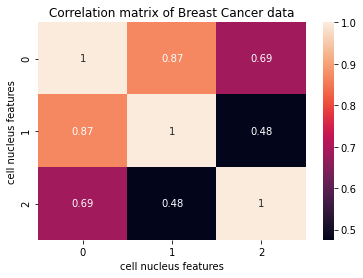

In [122]:
# Compute correlation among templates

import seaborn as sns
sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of templates for last recording from dataset")
plt.xlabel("Template number")
plt.ylabel("Template number")
plt.show()

In [11]:
from sklearn.cluster import KMeans

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [110]:
dataset = []
for i in range(10):
    for j in range(1, len(templates_sessions[i])):
        if j+1 in units_list[i]:
            dataset = dataset.append(np.array(templates_sessions[i])[:, 0, :])

AttributeError: 'NoneType' object has no attribute 'append'

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

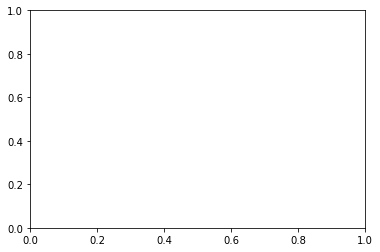

In [95]:
fig, ax = plt.subplots()
y_pred = KMeans(n_clusters=2).fit_predict(dataset)
ax.scatter(dataset[:, 0], dataset[:, 1], c=y_pred)
plt.title("K means clustering")

(42, 120)


Text(0.5, 1.0, 'K means clustering')

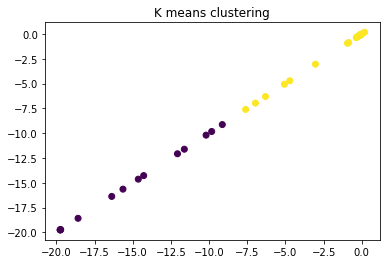

In [81]:
# Sample k means clustering - refined later
fig, ax = plt.subplots()
print(dataset.shape)
y_pred = KMeans(n_clusters=2).fit_predict(dataset)
ax.scatter(dataset[:, 0], dataset[:, 1], c=y_pred)
plt.title("K means clustering")

In [48]:
from scipy.ndimage.filters import gaussian_filter1d
def plot_metric(h, b, x_axis_label, color, max_value=-1):

    x = b[:-1]
    y = gaussian_filter1d(h, 1)

    plt.plot(x, y, color=color)
    plt.xlabel(x_axis_label)
    [plt.gca().spines[loc].set_visible(False) for loc in ['right', 'top', 'left']]
    if max_value < np.max(y) * 1.1:
        max_value = np.max(y) * 1.1
    plt.ylim([0, max_value])
    return h, b

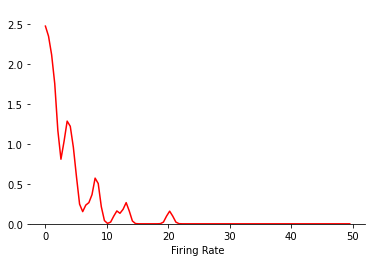

In [83]:
h = []
bins = np.linspace(0,50,100)
for x in range(len(sessions_used)):
    data = (metrics_sessions[x]['firing_rate'])
    hist, b = np.histogram(data, bins=bins, density=True)
    h.append(hist)

hist_sum = np.array(h).sum(axis=0)

max_value = plot_metric(hist_sum, b, 'Firing Rate', 'red')

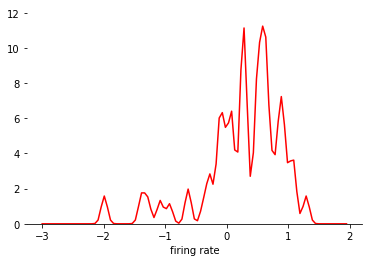

In [53]:
# Log scale of firing rates as most values are near origin

bins = np.linspace(-3,2,100)
h = []

for x in range(len(sessions_used)):
    data = np.log10(metrics_sessions[x]['firing_rate'])
    hist, b = np.histogram(data, bins=bins, density=True)
    h.append(hist)

hist_sum = np.array(h).sum(axis=0)

max_value = plot_metric(hist_sum, b, 'firing rate', 'red')

Number of valid units in acc_1_04262016_kurocoppola_pre before 4 after 2 with units [2, 4]
Number of valid units in acc_1_04072016_kurosawacoppola_pre before 6 after 3 with units [1, 2, 3]
Number of valid units in acc_1_06072016_kurosawa_Coppola_OT before 5 after 1 with units [1]
Number of valid units in acc_1_04202016_kurosawacoppola_pre before 3 after 1 with units [2]
Number of valid units in acc_1_04052016_kurocoppola_pre before 7 after 3 with units [1, 2, 6]
Number of valid units in acc_1_06152016_KurosawaCoppola_OT before 2 after 1 with units [2]
Number of valid units in acc_1_04192016_kurosawacoppola_pre before 3 after 1 with units [2]
Number of valid units in acc_1_04122016_kurosawacoppola_pre before 4 after 2 with units [2, 3]
Number of valid units in acc_1_04222016_kurosawacoppola_pre before 5 after 4 with units [2, 3, 4, 5]
Number of valid units in acc_1_06132016_kurosawaCoppola_OT before 3 after 2 with units [1, 2]


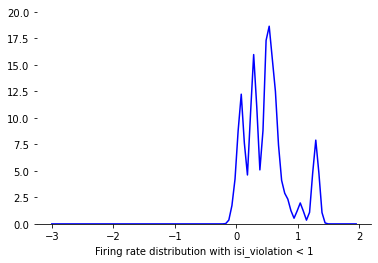

In [84]:
# Firing rate distribution removing values with isi violation > 1

bins = np.linspace(-3,2,100)
h = []
units_list = []

for x in range(len(sessions_used)):
    units = (metrics_sessions[x].index[metrics_sessions[x]['isi_violation'] < 1].tolist())
    units_list.append(units)
    sig = metrics_sessions[x][metrics_sessions[x].isi_violation < 1]
    print(f'Number of valid units in {sessions_used[x]} before {len(metrics_sessions[x])} after {len(sig)} with units {units}')
    if (len(sig) > 0):
        data = np.log10(sig['firing_rate'])
        hist, b = np.histogram(data, bins=bins, density=True)
        h.append(hist)

hist_sum = np.array(h).sum(axis=0)

max_value = plot_metric(hist_sum, b, 'Firing rate distribution with isi_violation < 1', 'blue')